In [ ]:
# DKCT

In [13]:
# Mecab 엔진 설치 스크립트 실행
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
<string>:1: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
Install mecab-python
/tmp ~/work/workplace/etc/dlthon
~/work/workplace/etc/dlthon
Processing /tmp/mecab-python-0.996
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 35, in <module>
        File "/tmp/mecab-python-0.996/setup.py", line 12, in <module>
          setup(name = "mecab-python",
        File "/opt/conda/lib/python3.12/site-packages/setuptools/_distutils/core.py", line 148, in setup
          _setup_distribution = dist = klass(attrs)
                                       ^^^^^^^^^^^^
        File "/opt/conda/l

In [14]:
!pip install mecab-python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.2/591.2 kB 8.0 MB/s eta 0:00:00


In [1]:
# 판다스 라이브러리를 불러옵니다.
import pandas as pd

# 1. train.csv 파일 불러오기
train_url = 'https://raw.githubusercontent.com/tunib-ai/DKTC/main/data/train.csv'
train_df = pd.read_csv(train_url)

# 2. test.json 파일 불러오기
test_url = 'https://raw.githubusercontent.com/tunib-ai/DKTC/main/data/test.json'
# pd.read_json()을 사용하고, orient='index' 옵션으로 파일 구조에 맞게 불러옵니다.
test_df = pd.read_json(test_url, orient='index')


# 3. sample_answersheet.json 파일 불러오기
answer_url = 'https://raw.githubusercontent.com/tunib-ai/DKTC/main/data/sample_answersheet.json'
answer_df = pd.read_json(answer_url)


In [2]:
# 각 DataFrame의 첫 5개 행을 출력하여 확인합니다.
print("--- train_df ---")
display(train_df.head())

print("\n--- test_df ---")
display(test_df.head())

print("\n--- answer_df ---")
display(answer_df.head())

--- train_df ---


,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...



--- test_df ---


,text
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...



--- answer_df ---


,t_000,t_001,t_002,t_003,t_004
class,1,2,2,4,3


In [3]:
# train 내용을 A,B로 분리해 대화의 흐름을 살펴봄 

# 대화 내용을 발화자 A와 B로 분리하는 함수를 정의합니다.
def split_users(x):
    # 대화를 줄바꿈('\n') 기준으로 나눕니다.
    conversation_lines = x.split('\n')
    
    # 짝수 번째 라인을 userA의 대화로 할당합니다. (0, 2, 4, ...)
    userA = conversation_lines[::2]
    # 홀수 번째 라인을 userB의 대화로 할당합니다. (1, 3, 5, ...)
    userB = conversation_lines[1::2]
    
    # 분리된 대화를 다시 합쳐서 pandas Series 형태로 반환합니다.
    return pd.Series(['\n'.join(userA), '\n'.join(userB)], index=['A', 'B'])

# train_df의 'conversation' 컬럼에 위 함수를 적용하여 'A'와 'B' 컬럼을 새로 생성합니다. 🗣️✂️
train_df[['A', 'B']] = train_df['conversation'].apply(split_users)

# 작업 결과 확인: 'class' 컬럼에 '협박'이 포함된 데이터 중 10개(201번째~210번째)를 샘플로 출력합니다.
train_df[train_df['class'].str.contains('협박')][200:210]

,idx,class,conversation,A,B
955,955,협박 대화,넌 그냥 죽어야해 이 한국남자야\n그러지 마세요 왜 그러세요\n넌 그냥 죽어 \n죽...,넌 그냥 죽어야해 이 한국남자야\n넌 그냥 죽어 \n한국남자는 여자들 강간하고 노예...,그러지 마세요 왜 그러세요\n죽기전에 이유나 들어보자 왜 그러는데요\n전 적어도 그...
959,959,협박 대화,조국을 배신하는 건가?\n말 똑바로 해. 조국이라고 할 것도 없으니까. \n고아인 ...,조국을 배신하는 건가?\n고아인 너에게 기회를 주고 키워준 건 조국이야. \n조국의...,말 똑바로 해. 조국이라고 할 것도 없으니까. \n누가 키워달라고 했나? 어린시절은...
961,961,협박 대화,비행기에 위급 환자가 생겼습니다. 과다출혈로 피가 부족한 상태이오니 헌혈 부탁드립니...,비행기에 위급 환자가 생겼습니다. 과다출혈로 피가 부족한 상태이오니 헌혈 부탁드립니...,형 입니다. 형 이에요.\n의료진 있으니 제발 안심하고 와주세요. 제 동생 죽어요 ...
963,963,협박 대화,저번에 말한 물건들 준비됐어?\n아니 선생님. 시간을 조금만 더 주세요.\n저번에도...,저번에 말한 물건들 준비됐어?\n저번에도 그랬잖아. 이번엔 그냥 안넘어가\n그래? ...,아니 선생님. 시간을 조금만 더 주세요.\n그리고 원래 300개만 준비해달라 하셨는...
964,964,협박 대화,너 돈 언제 갚을꺼야?\n미안해. 다음달까지 기달려줘\n벌써 6개월이나 더 기달려줬...,너 돈 언제 갚을꺼야?\n벌써 6개월이나 더 기달려줬잖아. 언제까지 기달려달라고 하...,미안해. 다음달까지 기달려줘\n제발 믿고 기달려줄 수 없을까?? 정말 미안해. 다음...
965,965,협박 대화,니가.감히. 우리 아빠를 죽음으로 몰고 가놓고.?\n민재야.제발.미안해.나. 나 좀...,니가.감히. 우리 아빠를 죽음으로 몰고 가놓고.?\n니가 그 때 술만 안먹었으면 아...,민재야.제발.미안해.나. 나 좀 살려줘.\n미안해. 내가 그 때 너무.생각이 짧았어...
968,968,협박 대화,아니 나한테 송아지를 넘기기로 했으면서 이제와서 무슨말인가\n아 저기 옆마을 한씨가...,아니 나한테 송아지를 넘기기로 했으면서 이제와서 무슨말인가\n아니 그래도 사람이 약...,아 저기 옆마을 한씨가 더 비싸게 쳐주기로한다지 뭔가\n약속은먼저 했는데 나도 돈이...
969,969,협박 대화,너 오랜만이다.\n. 그래. 근데 오랜만이다. 그런데 우리가 이럴 사이는 아니지 않...,너 오랜만이다.\n하.! 너 많이도 컸다 어릴 때는 많이 맞았던 주제에 \n이 새끼...,. 그래. 근데 오랜만이다. 그런데 우리가 이럴 사이는 아니지 않냐?\n그때는 당해...
970,970,협박 대화,돈을 빌려갔으면 갚아야할거아냐\n갚을게 갚을게\n 내가 지금 죽게 생겼어!\n 미안...,돈을 빌려갔으면 갚아야할거아냐\n 내가 지금 죽게 생겼어!\n다필요없네 자네 콩팥이...,갚을게 갚을게\n 미안하게 됐네 자금이 막혀서\n아니 왜그러나 친구 정신차리게\n얼...
971,971,협박 대화,야 너 딴 남자랑 뭐했냐 너 더 맞을래\n아니 그렇다고 왜 때려 말로해\n내가 지금...,야 너 딴 남자랑 뭐했냐 너 더 맞을래\n내가 지금 말로 하게 생겼냐\n와 이게 뻔...,아니 그렇다고 왜 때려 말로해\n아니 그러지마 오해라고\n자꾸 그러면 경찰 부른다\...


# 대화 흐름 분석
    1. 명확한 가해자와 피해자 구도로 분리됨
    2. 대화 내용에서 일관된 패턴 나타남 
        -요구와 회피/애원: 한쪽이 돈, 물건, 정보 등 무언가를 강력하게 요구하고, 다른 쪽은 이를 거절하거나 시간을 벌려고 애원. (예: idx 963, idx 964)
        -과거 행동에 대한 비난과 변명: 과거의 잘못(배신, 빚, 사고 등)을 원인으로 한쪽이 상대를 비난하고 위협하며, 다른 쪽은 변명하거나 사과합니다. (예: idx 959, idx 965)
        -일방적인 폭언과 수동적인 반응: 특별한 이유 없이 한쪽이 일방적으로 폭언을 쏟아내고, 다른 쪽은 소극적으로 반응하며 대화를 피하려고 합니다. (예: idx 955, idx 971)
    3. 협박의 핵심 주제 (Triggers)
        -협박이 발생하는 주요 원인(주제)들을 파악할 수 있습니다.
        -금전 문제: 빌린 돈을 갚으라는 독촉이 가장 흔한 유형입니다. (idx 964, idx 970)
        -복수 및 원한: 과거의 사건(배신, 사고 등)에 대한 복수심이 협박으로 이어집니다. (idx 959, idx 965)
        -강요 및 갈취: 원치 않는 물건이나 행동을 강요하는 상황입니다. (idx 963, idx 968)

        -인신공격 및 비하: 상대방의 존재 자체를 비하하며 위협을 가합니다. (idx 955)

--- 'conversation' 컬럼 문자 구성 분석 ---
총 문자 수: 894,955 개

🔹 Korean
   - 절대값: 617,120 개
   - 비율: 68.96 %

🔹 English
   - 절대값: 0 개
   - 비율: 0.00 %

🔹 Digit
   - 절대값: 2,515 개
   - 비율: 0.28 %

🔹 Other Chars
   - 절대값: 275,320 개
   - 비율: 30.76 %



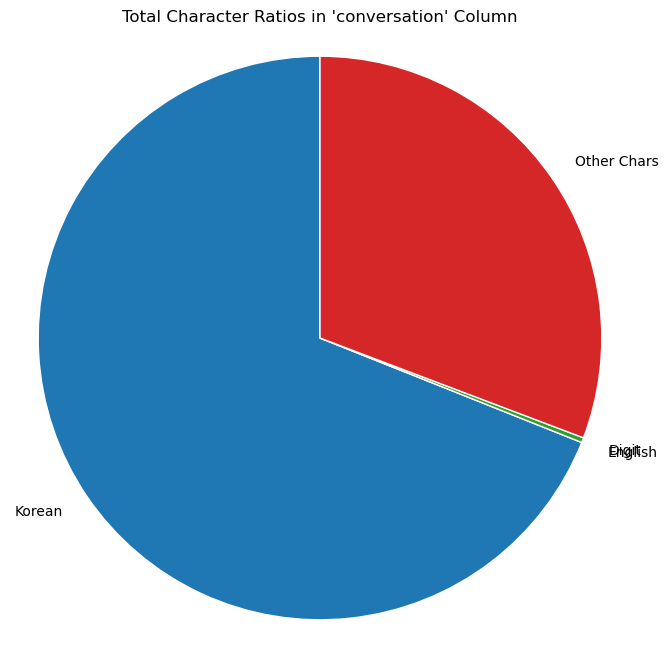

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# 1. 각 문자의 '총 개수' 계산 (이전과 동일)
total_korean_count = 0
total_english_count = 0
total_digit_count = 0
grand_total_len = 0

for text in train_df['conversation']:
    total_len = len(text)
    if total_len == 0: continue
    
    grand_total_len += total_len
    total_korean_count += len(re.findall('[가-힣]', text))
    total_english_count += len(re.findall('[a-zA-Z]', text))
    total_digit_count += sum(c.isdigit() for c in text)

total_other_count = grand_total_len - (total_korean_count + total_english_count + total_digit_count)

counts = pd.Series([
    total_korean_count,
    total_english_count,
    total_digit_count,
    total_other_count
], index=['Korean', 'English', 'Digit', 'Other Chars'])


# 2. 비율과 절대값 텍스트로 출력 📄
print("--- 'conversation' 컬럼 문자 구성 분석 ---")
print(f"총 문자 수: {grand_total_len:,.0f} 개\n")

# 각 항목별 절대값과 비율을 계산하여 출력
for label, value in counts.items():
    # 총 문자 수가 0일 경우를 대비하여 예외 처리
    ratio = (value / grand_total_len) * 100 if grand_total_len > 0 else 0
    print(f"🔹 {label}")
    print(f"   - 절대값: {value:,.0f} 개")
    print(f"   - 비율: {ratio:.2f} %\n")


# 3. 수치가 제거된 그래프 생성 🎨
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=counts.index,
    autopct=None, # 그래프 위에 수치를 표시하지 않음
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Total Character Ratios in 'conversation' Column")
plt.axis('equal')
plt.show()

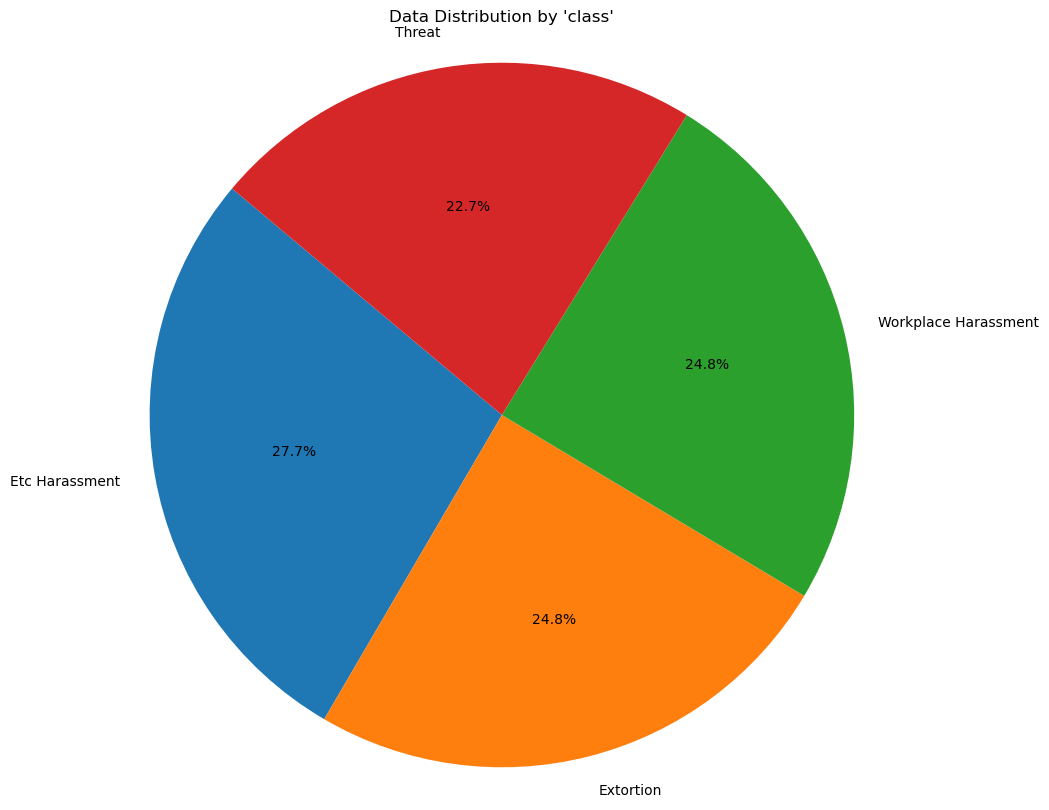

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 'class' 컬럼의 값별 데이터 개수 계산
class_counts = train_df['class'].value_counts()

# 그래프 라벨을 한글에서 영어로 직접 변환 💬 -> 🔡
# 딕셔너리를 사용해 각 클래스 이름을 매핑합니다.
label_map = {
    '기타 괴롭힘 대화': 'Etc Harassment',
    '갈취 대화': 'Extortion',
    '직장 내 괴롭힘 대화': 'Workplace Harassment',
    '협박 대화': 'Threat'
}
# value_counts() 결과의 인덱스(클래스 이름)를 영어로 바꿉니다.
english_labels = class_counts.index.map(label_map)


# 원 그래프 생성 🎨
plt.figure(figsize=(10, 10))
plt.pie(
    class_counts,
    labels=english_labels, # 영어로 변환된 라벨을 사용합니다.
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Data Distribution by 'class'")
plt.axis('equal')
plt.show()

In [6]:
train_df

,idx,class,conversation,A,B
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 죽을 거면 혼자 죽지 우리까지 사...,아닙니다. 죄송합니다.\n 정말 잘못했습니다.\n 죄송합니다. 정말 잘못했습니다....
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다.\n네?\n장난전화 걸지 마시죠. \n장난전화는 업무방해죄에 해당됩...,9시 40분 마트에 폭발물을 설치할거다.\n똑바로 들어 한번만 더 얘기한다.\n9시...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n지영아 너가 키 160이지?...,그만해. 니들 놀리는거 재미없어.\n너 군대도 안가고 좋겠다.\n난쟁이들도 장가가고...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기\n너 말이야 너. 이리 오라고\n너 옷 좋아보인다?\n아니에요.돈 없어요...,예??\n무슨 일.\n얘 돈 좀 있나봐\n뒤져서 나오면 넌 죽는다\n콜. 마지막 기...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n음....
...,...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,준하야 넌 대가리가 왜이렇게 크냐?\n밥먹으면 대가리만 크냐 너는?\n주위를 둘러봐...,내 머리가 뭐.\n아니. 무슨 머리만 큰다고 그러는거야\n나한테 왜그러는거야.\n넌...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n말로?...,예.? 선생님 진정하시고 우리 말로 해결합시다.\n제발 저희 아들만은 건드리지 말아...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n들리라고 해. 아니...,왜 그래. 들리겠어.\n하긴 그래서 저번에 부장님도.\n그러게.\n나도 그건 못본거...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,누구맘대로 여기서 장사하래?\n남의 구역에서 장사하려면 자릿세를 내야지.\n그거랑 ...,이게 무슨일입니까?\n관청에 신고다하고 적법하게 장사하는 건데 자릿세라뇨?\n못 드...


In [12]:
# 분석에 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Mecab
from collections import Counter

# Matplotlib 한글 폰트 설정 (이전 단계에서 설치 완료 가정)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.rcParams['axes.unicode_minus'] = False
# 폰트 문제 발생 시, 아래처럼 영어 라벨로 대체하여 사용
use_korean_font = False # True로 바꾸면 한글 폰트 사용

# Mecab 객체 생성
mecab = Mecab()

# -- 데이터 전처리 --
# 1. 대화를 턴(turn) 리스트로 분리하여 새 컬럼 추가
train_df['turns_list'] = train_df['conversation'].str.split('\n')

# 2. 각 대화를 형태소 리스트로 분리하여 새 컬럼 추가
train_df['corpus'] = train_df['conversation'].apply(lambda x: mecab.morphs(x))

print("사전 준비 완료. 'turns_list'와 'corpus' 컬럼이 추가되었습니다.")
train_df[['conversation', 'turns_list', 'corpus']].head()

사전 준비 완료. 'turns_list'와 'corpus' 컬럼이 추가되었습니다.


,conversation,turns_list,corpus
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,"[지금 너 스스로를 죽여달라고 애원하는 것인가?, 아닙니다. 죄송합니다., 죽을...","[지금, 너, 스스로, 를, 죽여, 달, 라고, 애원, 하, 는, 것, 인가, ?,..."
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,"[길동경찰서입니다., 9시 40분 마트에 폭발물을 설치할거다., 네?, 똑바로 들어...","[길동, 경찰서, 입니다, ., 9, 시, 40, 분, 마트, 에, 폭발물, 을, ..."
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,"[너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어., 그만해. 니들 놀리는거 재...","[너, 되게, 귀여운, 거, 알, 지, ?, 나, 보다, 작, 은, 남자, 는, 첨..."
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,"[어이 거기, 예??, 너 말이야 너. 이리 오라고, 무슨 일., 너 옷 좋아보인다...","[어, 이, 거기, 예, ?, ?, 너, 말, 이, 야, 너, ., 이리, 오, 라..."
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,[저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에...,"[저기, 요, 혹시, 날, 이, 너무, 뜨겁, 잖아요, ?, 저희, 회사, 에서, ..."


In [ ]:
#클래스별 분석

In [ ]:
#클래스별 길이 분석

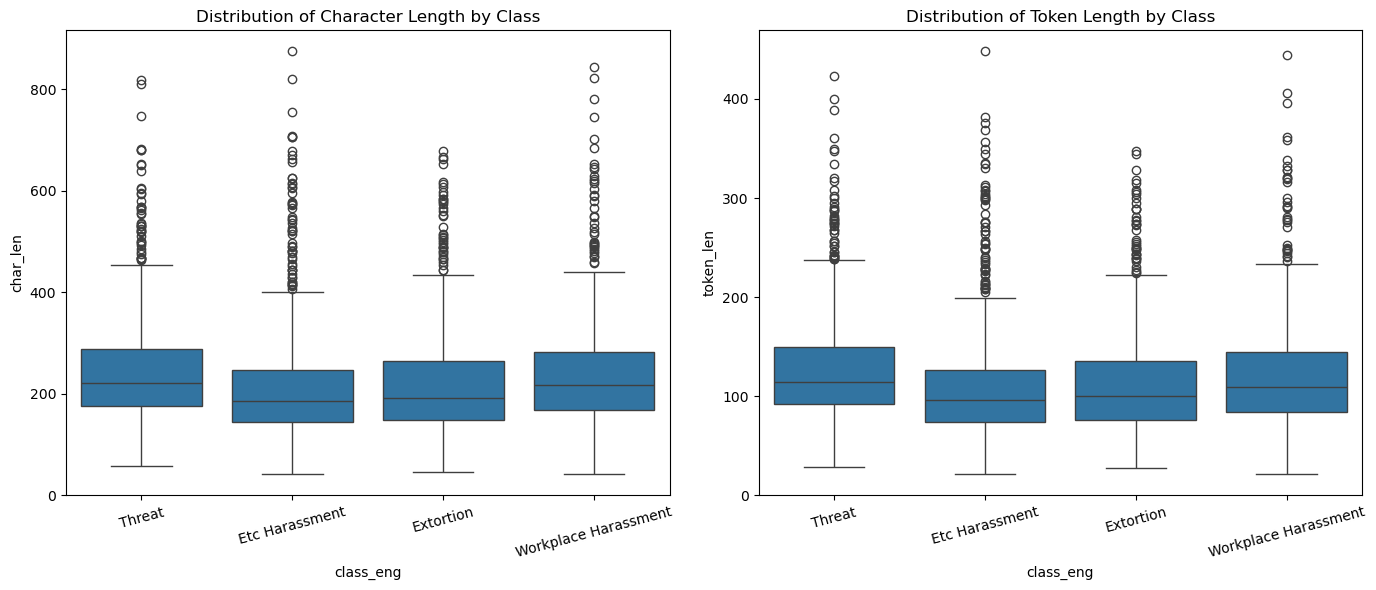

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기 위한 데이터프레임 복사
plot_df = train_df.copy()

# 그래프 라벨을 한글에서 영어로 변환하는 딕셔너리
label_map = {
    '기타 괴롭힘 대화': 'Etc Harassment',
    '갈취 대화': 'Extortion',
    '직장 내 괴롭힘 대화': 'Workplace Harassment',
    '협박 대화': 'Threat'
}

# 영어 라벨 컬럼 추가
plot_df['class_eng'] = plot_df['class'].map(label_map)

# 시각화: Box Plot (영어로 변환된 라벨 사용)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# x축에 영어 라벨('class_eng')을 사용
sns.boxplot(x='class_eng', y='char_len', data=plot_df)
plt.title('Distribution of Character Length by Class')
plt.xticks(rotation=15) # 라벨이 길 경우 살짝 회전

plt.subplot(1, 2, 2)
# x축에 영어 라벨('class_eng')을 사용
sns.boxplot(x='class_eng', y='token_len', data=plot_df)
plt.title('Distribution of Token Length by Class')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

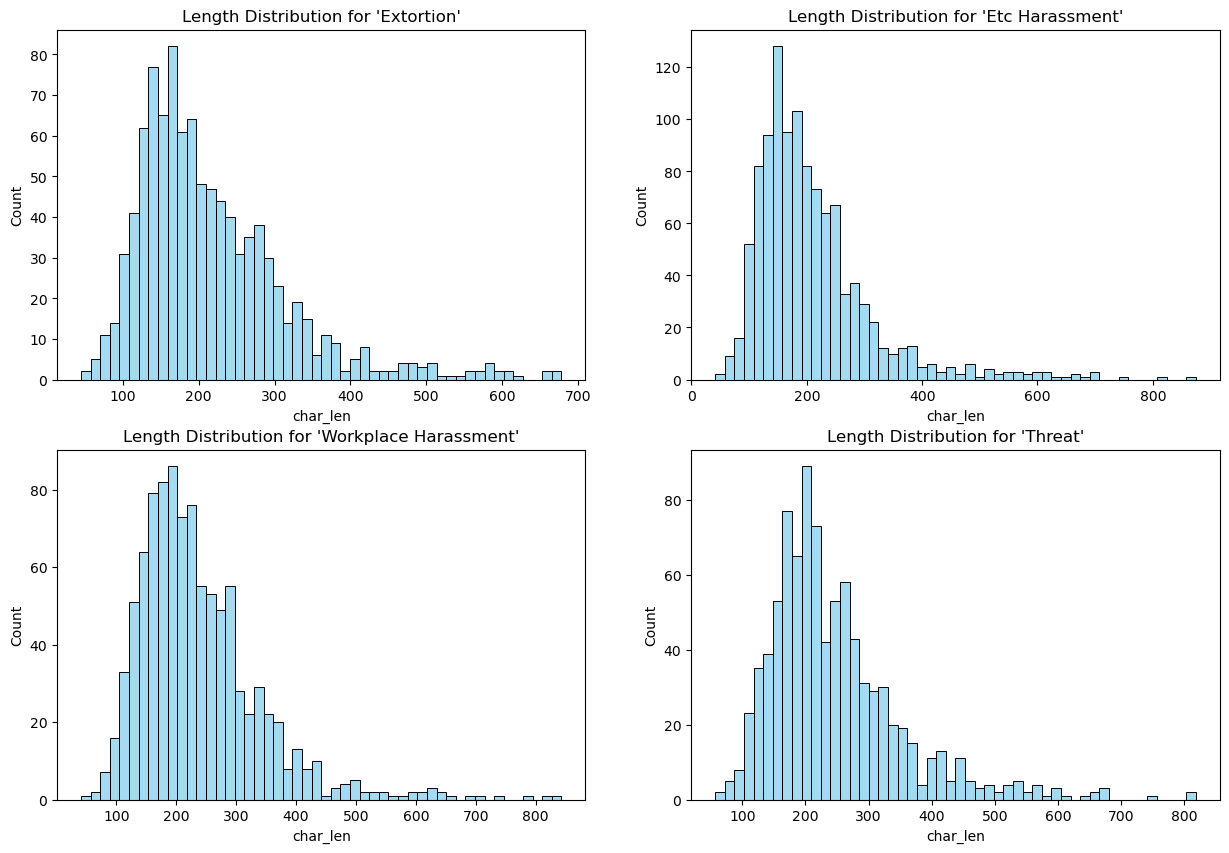

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

# 1. Matplotlib 설정을 기본값으로 초기화 (중요) 🔄
# 이전에 실행한 plt.rc('font', ...) 설정을 모두 제거합니다.
mpl.rcdefaults()

# 2. 2x2 형태의 그래프 영역 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 3. 클래스 이름 리스트
class_names = sorted(train_df['class'].unique())

# 4. 각 클래스별로 반복하며 그래프 그리기
for i, class_name in enumerate(class_names):
    ax = axes[i]
    class_df = train_df[train_df['class'] == class_name]
    lengths = class_df['char_len']
    
    max_len = lengths.max()
    mean_len = lengths.mean()
    
    sns.histplot(data=lengths, bins=50, ax=ax, color='skyblue')
    
    # 그래프 제목 (영어로)
    english_class_name = label_map.get(class_name, class_name)
    ax.set_title(f"Length Distribution for '{english_class_name}'")
    
    # x축, y축 라벨 (영어로)

In [15]:
# 'class' 컬럼의 값별 데이터 개수 계산
class_counts = train_df['class'].value_counts()

print("--- 클래스별 주요 수치 요약 📝 ---")

# 각 클래스 이름으로 반복
for class_name, count in class_counts.items():
    # 현재 클래스에 해당하는 데이터만 필터링
    class_df = train_df[train_df['class'] == class_name]
    
    # 길이 통계 계산
    avg_char_len = class_df['char_len'].mean()
    min_char_len = class_df['char_len'].min()
    max_char_len = class_df['char_len'].max()
    
    avg_token_len = class_df['token_len'].mean()
    min_token_len = class_df['token_len'].min()
    max_token_len = class_df['token_len'].max()
    
    # 결과 출력
    print(f"\n▶ 클래스: {class_name}")
    print(f"  - 데이터 양: {count} 개")
    print(f"  - 글자 수 (평균/최소/최대): {avg_char_len:.1f} / {min_char_len} / {max_char_len}")
    print(f"  - 토큰 수 (평균/최소/최대): {avg_token_len:.1f} / {min_token_len} / {max_token_len}")

--- 클래스별 주요 수치 요약 📝 ---

▶ 클래스: 기타 괴롭힘 대화
  - 데이터 양: 1094 개
  - 글자 수 (평균/최소/최대): 210.1 / 41 / 874
  - 토큰 수 (평균/최소/최대): 108.0 / 21 / 448

▶ 클래스: 갈취 대화
  - 데이터 양: 981 개
  - 글자 수 (평균/최소/최대): 216.2 / 45 / 678
  - 토큰 수 (평균/최소/최대): 111.6 / 27 / 347

▶ 클래스: 직장 내 괴롭힘 대화
  - 데이터 양: 979 개
  - 글자 수 (평균/최소/최대): 237.6 / 41 / 843
  - 토큰 수 (평균/최소/최대): 120.3 / 21 / 444

▶ 클래스: 협박 대화
  - 데이터 양: 896 개
  - 글자 수 (평균/최소/최대): 246.1 / 57 / 818
  - 토큰 수 (평균/최소/최대): 127.2 / 28 / 423


# 길이 분석 경향성

중심 경향성은 비슷하지만 약간의 차이는 존재합니다.

박스 중앙의 선(중앙값, Median)을 보면, **'Threat(협박)'**와 **'Workplace Harassment(직장 내 괴롭힘)'**가 'Etc Harassment(기타 괴롭힘)'나 'Extortion(갈취)'보다 약간 더 높은 위치에 있습니다. 이는 이 두 클래스의 대화가 평균적으로 조금 더 긴 경향이 있음을 시각적으로 보여줍니다.

모든 클래스에서 길이의 편차가 큽니다.

모든 박스가 위아래로 길고, 박스 위쪽으로 뻗은 수염(whisker)과 점(outlier, 이상치)들이 멀리 퍼져 있습니다. 이는 모든 클래스 내에 평균보다 훨씬 긴 대화가 다수 포함되어 있음을 의미합니다. 즉, 대화 길이는 클래스와 상관없이 매우 다양합니다.

데이터 분포 형태가 유사합니다.

네 클래스 모두 중앙값보다 긴 쪽으로 데이터가 더 넓게 분포하는 유사한 형태(오른쪽으로 꼬리가 긴 분포)를 보입니다. 이는 어떤 위협 유형이든 짧은 대화보다는 길어지는 경우가 더 많다는 공통적인 특징을 가집니다.

In [ ]:
#클래스별 구조 분석

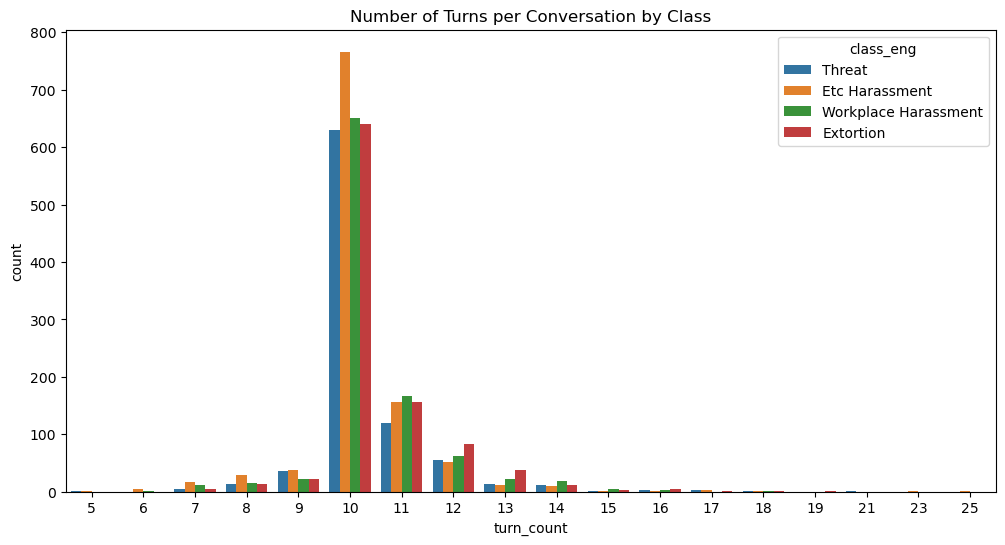

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기 위한 데이터프레임 복사 및 영어 라벨 추가
plot_df = train_df.copy()
label_map = {
    '기타 괴롭힘 대화': 'Etc Harassment',
    '갈취 대화': 'Extortion',
    '직장 내 괴롭힘 대화': 'Workplace Harassment',
    '협박 대화': 'Threat'
}
plot_df['class_eng'] = plot_df['class'].map(label_map)

# 시각화: Count Plot (hue 옵션에 영어 라벨 사용)
plt.figure(figsize=(12, 6))
# hue에 'class_eng'를 사용합니다.
sns.countplot(x='turn_count', hue='class_eng', data=plot_df)
plt.title('Number of Turns per Conversation by Class')
plt.show()

# 구조 분석 경향성

강력한 중앙 집중 경향 

평균(mean), 중앙값(50%), 그리고 **사분위수(25%, 75%)**를 보면 모든 클래스에서 값이 10에 매우 가깝게 집중되어 있습니다.

특히 중앙값이 모두 정확히 10.0이라는 것은, 각 클래스에서 가장 흔한 대화가 정확히 10번의 턴으로 구성되어 있음을 의미합니다.

데이터 생성 방식에 대한 추론

이렇게 모든 클래스에서 턴 수가 일관적인 것은 데이터셋이 **"10턴짜리 대화를 생성하라"**와 같은 특정 가이드라인에 따라 만들어졌을 가능성이 높다는 것을 암시합니다.

모델 학습에 대한 시사점

결론적으로 모델은 대화가 몇 번 오고 갔는지를 보고 클래스를 예측해서는 안 되며, 이전 분석과 마찬가지로 대화의 내용과 맥락 자체에 집중하여 학습해야 합니다.

In [30]:
# 이전에 생성한 화자 A, B의 대화 목록 컬럼이 필요합니다.
# train_df[['A', 'B']] = train_df['conversation'].apply(split_users)
# 위 코드가 실행되었다고 가정합니다.

# 각 턴의 정보를 저장할 리스트
turn_data = []

# train_df를 한 줄씩 순회
for index, row in train_df.iterrows():
    class_name = row['class']
    
    # 화자 A의 각 턴에 대한 정보 추가
    a_turns = row['A'].strip().split('\n')
    for turn in a_turns:
        if turn: # 빈 턴은 제외
            turn_data.append({
                'class': class_name,
                'speaker': 'A',
                'turn_length': len(turn)
            })
            
    # 화자 B의 각 턴에 대한 정보 추가
    b_turns = row['B'].strip().split('\n')
    for turn in b_turns:
        if turn: # 빈 턴은 제외
            turn_data.append({
                'class': class_name,
                'speaker': 'B',
                'turn_length': len(turn)
            })

# 리스트를 새로운 데이터프레임으로 변환
turn_df = pd.DataFrame(turn_data)

print("턴(Turn) 단위 데이터프레임 생성 완료")
display(turn_df.head())

턴(Turn) 단위 데이터프레임 생성 완료


,class,speaker,turn_length
0,협박 대화,A,25
1,협박 대화,A,42
2,협박 대화,A,27
3,협박 대화,A,44
4,협박 대화,A,21


--- 클래스별 턴(Turn) 길이 통계 ---


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
갈취 대화,10288.0,19.689444,14.783768,1.0,10.0,16.0,25.0,221.0
기타 괴롭힘 대화,11161.0,19.665532,15.200908,1.0,9.0,16.0,26.0,191.0
직장 내 괴롭힘 대화,10164.0,21.954349,16.345848,1.0,11.0,18.0,29.0,166.0
협박 대화,9263.0,22.874339,16.096729,1.0,12.0,19.0,29.0,161.0


/tmp/ipykernel_6783/3358965870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='turn_length', data=turn_df, palette='pastel')
/tmp/ipykernel_6783/3358965870.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(english_labels, rotation=10)


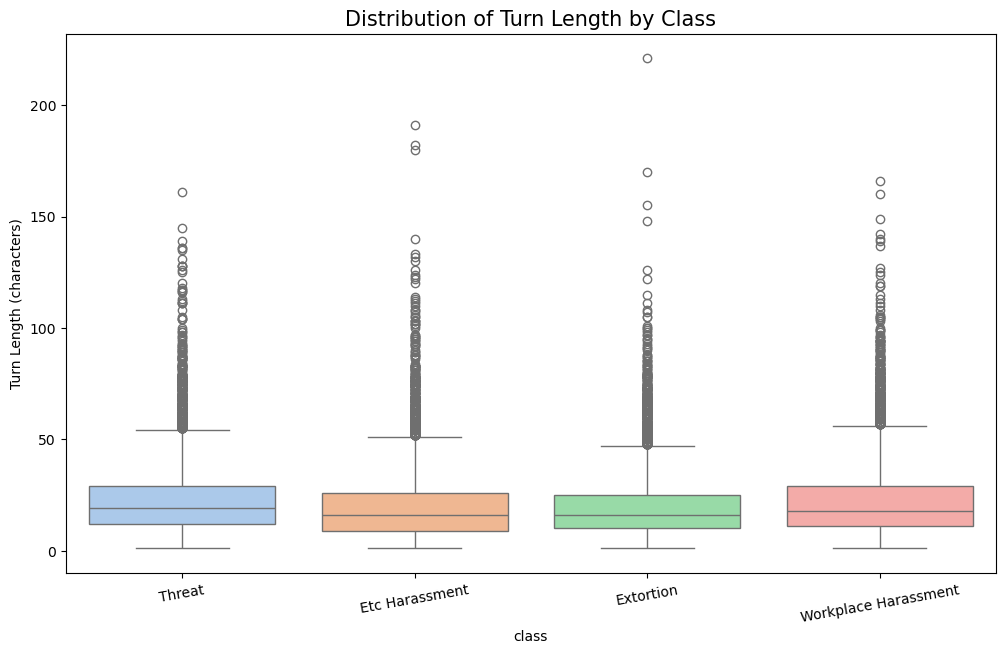

In [31]:
print("--- 클래스별 턴(Turn) 길이 통계 ---")
# 클래스별로 턴 길이의 주요 통계치(평균, 중앙값 등)를 확인합니다.
display(turn_df.groupby('class')['turn_length'].describe())

# 시각화: Box Plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='class', y='turn_length', data=turn_df, palette='pastel')
plt.title('Distribution of Turn Length by Class', fontsize=15)
plt.ylabel('Turn Length (characters)')

# x축 라벨을 영어로 변환 (폰트 문제 방지)
english_labels = [label_map.get(label.get_text(), label.get_text()) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(english_labels, rotation=10)

plt.show()


--- 클래스 및 화자(A, B)별 턴(Turn) 길이 통계 ---


count       mean        std  min   25%   50%   75%  \
class       speaker                                                        
갈취 대화       A        5257.0  23.663306  15.834727  1.0  13.0  20.0  30.0   
            B        5031.0  15.537070  12.297512  1.0   7.0  12.0  20.0   
기타 괴롭힘 대화   A        5700.0  22.446491  15.510943  1.0  12.0  19.0  28.0   
            B        5461.0  16.762864  14.306316  1.0   7.0  13.0  22.0   
직장 내 괴롭힘 대화 A        5198.0  26.041747  16.972308  1.0  14.0  22.0  34.0   
            B        4966.0  17.675997  14.477358  1.0   7.0  14.0  23.0   
협박 대화       A        4722.0  25.964845  16.621165  1.0  15.0  22.0  33.0   
            B        4541.0  19.660647  14.867921  1.0   9.0  16.0  26.0   

                       max  
class       speaker         
갈취 대화       A        221.0  
            B        126.0  
기타 괴롭힘 대화   A        182.0  
            B        191.0  
직장 내 괴롭힘 대화 A        166.0  
            B        149.0  
협박 대화       A        145.0  
            B        161.0

/tmp/ipykernel_6783/3462362258.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(english_labels, rotation=10)


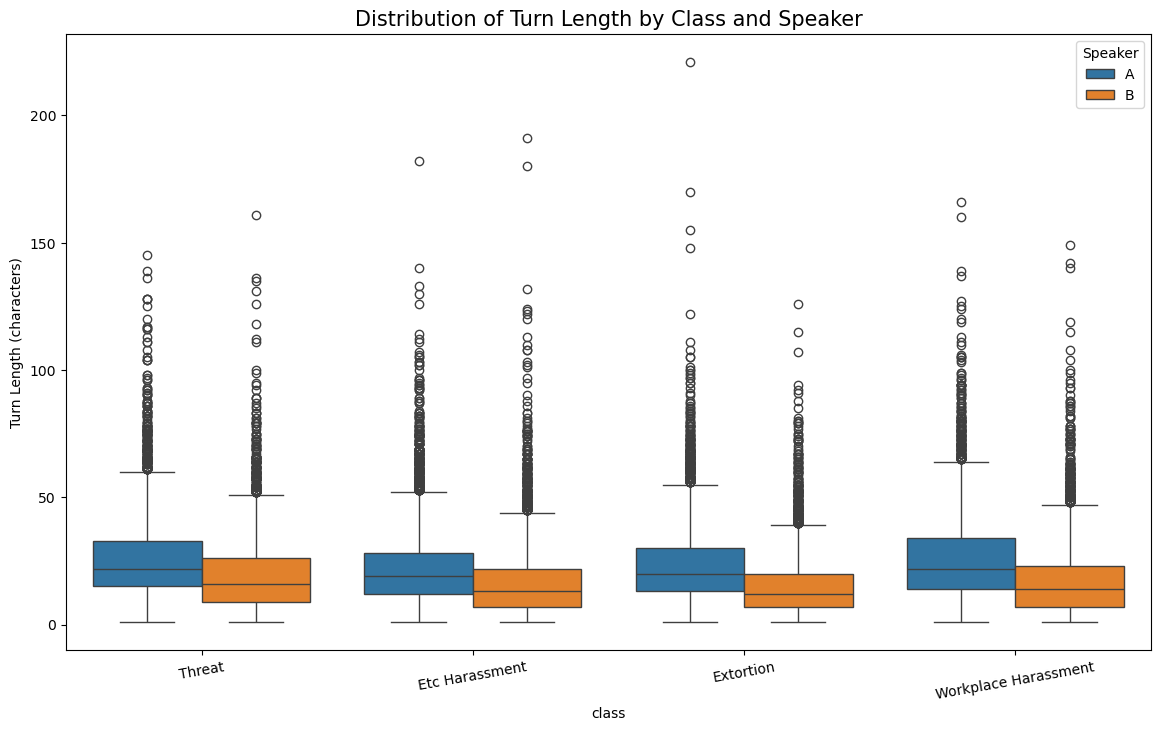

In [32]:
print("\n--- 클래스 및 화자(A, B)별 턴(Turn) 길이 통계 ---")
# 클래스와 화자별로 턴 길이의 통계치를 확인합니다.
display(turn_df.groupby(['class', 'speaker'])['turn_length'].describe())

# 시각화: Box Plot (hue 옵션 사용)
plt.figure(figsize=(14, 8))
# hue='speaker' 옵션을 추가하여 화자 A와 B를 색상으로 구분합니다.
sns.boxplot(x='class', y='turn_length', hue='speaker', data=turn_df)
plt.title('Distribution of Turn Length by Class and Speaker', fontsize=15)
plt.ylabel('Turn Length (characters)')

# x축 라벨을 영어로 변환
english_labels = [label_map.get(label.get_text(), label.get_text()) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(english_labels, rotation=10)

plt.legend(title='Speaker')
plt.show()

In [ ]:
# 언어 패턴 분석
    # 주요 사용 어휘
    #목적: 각 클래스에서 자주 사용되는 핵심 단어를 파악합니다. 이를 통해 '위협'의 특징을 학습하고, '일반 대화'에서는 이런 단어 사용을 피해야 함을 알 수 있습니다.

In [19]:
# 각 클래스별로 10개의 샘플을 랜덤하게 추출
# random_state를 고정하면 항상 동일한 샘플이 추출되어 분석에 용이합니다.
sampled_df = train_df.groupby('class').sample(n=10, random_state=42)

# 클래스별로 보기 좋게 정렬하여 출력
for class_name in sorted(train_df['class'].unique()):
    
    # 영어 클래스 이름 가져오기 (이전 코드 재사용)
    english_class_name = label_map.get(class_name, class_name)
    print(f"--- Class: {english_class_name} (Sample 10) ---")
    
    # conversation 내용만 깔끔하게 출력
    class_samples = sampled_df[sampled_df['class'] == class_name]
    for i, conversation in enumerate(class_samples['conversation']):
        print(f"[{i+1}] {conversation.replace(chr(10), ' ')}\n") # 줄바꿈을 공백으로 바꿔 한 줄로 표시
    print("-" * 50 + "\n")

--- Class: Extortion (Sample 10) ---
[1] 야 잘 지냈냐?  어. 안녕 오랜만이네  야 왠일이냐 이 번화가에 다 오고  아 그냥 볼일이 있어서  너 요새 돈좀 있나보다 손에 그건 뭐냐?  아 이건 안돼 엄마 심부름이야  야 나이가 몇인데 심부름이야   이건 진짜 안된다고  야 빨리 내놔 맞기 전에  안돼

[2] 야 너 어제 여자탈의실 몰래 훔쳐봤지?  아니야 내가 언제  내가 다 봤어. 어제 2층 여자탈의실 앞에서. 너 학교에 확 소문내버린다  아니야 제발그러지마  근데 너 그옷 좋아보인다?  뭐?. 이 옷?.  그래 그 옷 한번 입어보자 비싸보인다  안돼 아빠가 사주신거야  그래? 그럼 소문내도 상관없지? 내일부터 얼굴못들고 다니게 해줄게  안되는데. 여기. 몇번 입고 돌려줘

[3] 어디그리급히 가시나요?  어머머 누구세요 ? 그건 알필요없고 그 종이가방 엄청 소중히 안고가시네요  신고할꺼예요 ! ! 경찰이 빠를까요 제가 빠를까요 ? 소리지를꺼예요 !  질러질러 아이고 사람들 여기와보세요 이아주머니가 저를 치한으로 모네요 제발 그냥 보내주세요  그냥 가세요 종이가방만 고히 놓고   말도 안되는 소리 그만하세요

[4] 이거 니 주민등록증 아니야? 잃어버린줄 알았는데.고마워! 고맙긴 뭘 근데 말야 이런 거 찾아주면 원래 사례금 같은 거 주지않나? 응.? 사례금? 내가 찾았으니 다행이지 모르는 사람이 니꺼 찾았으면 니 정보 다 들통나는 거잖아 그건 그렇지. 알겠어 ! 얼마나 생각하고 있어? 한 5만원 정도는 줘야하는 거아냐? 그렇게나 많이.? 싫음 말고 혹시 몰라서 내가 니꺼 주민등록증 사진 찍어놨거든 . 그거 불법아냐? 남의 개인정보잖아. 흘려서 잃어버리고 다닌 니가 잘못이지 왜 내가 잘못이야? 할튼 줄거야 말거야

[5] 야 나 저번에 그 일 있는 이후로 몸이 안 좋아서 병원 갔는데 나 병 걸렸대. 뭔 병? 많이 아파? 어떡해 내가 지금 갈까? 아니 오지 마 나 성병 걸렸대. 그니까 빨리 치료비 보내 거의 30만원 깨지게 생

# 대화 패턴의 경향성


1. Class: Extortion (갈취)
   
-화행(Speech Acts): 명확한 가해자-피해자 구도가 나타납니다. 한쪽은 명시적으로 금품이나 물건을 요구(빨리 내놔, 치료비 보내, 돈 좀 빌릴 수 있을까)하고, 다른 한쪽은 처음에는 저항(안돼, 아니야)하다가 결국 위협에 굴복하여 요구를 들어주는 패턴이 반복됩니다.

-핵심 주제(Core Topic): 주제가 **'금전 및 물품 요구'**로 매우 명확하고 집중되어 있습니다. 사례금, 치료비, 차비, 병원비, 핸드폰 등 구체적인 대상을 명시하며, 때로는 개인정보(주민등록증, 페북에 글써버릴거야)를 빌미로 협박합니다.

-감정/어조(Emotion/Tone): 초기에는 회유하는 척하다가, 상대가 저항하면 점차 노골적인 협박으로 어조가 바뀝니다. 맞기 전에, 소문내도 상관없지?, 10원당 한대야 등 위협을 통해 심리적 압박을 가합니다.

-구조적 특징: '요구 → 저항 → 위협 → 굴복' 이라는 뚜렷한 기승전결 구조를 가집니다. 대화의 목적이 명확하여, 목적이 달성되면 대화가 종결되는 경향이 있습니다.


2. Class: Etc Harassment (기타 괴롭힘)

-화행(Speech Acts): 권력 관계가 존재하지만 '갈취'처럼 명확한 요구-굴복 관계보다는 **'일방적인 시비와 비난'**이 주를 이룹니다. 피해자는 변명하거나 논리적으로 반박(말이 좀 심한거 아니니?, 규정상 어렵습니다)하려 하지만, 가해자는 이를 무시하고 계속해서 인신공격을 합니다.

-핵심 주제(Core Topic): 주제가 매우 다양하고 광범위합니다. 부모의 직업 비하(삼백충), 외모 비하(못생긴애들), 헛소문 퍼뜨리기(아빠 회사 잘렸다며), 부당한 고객 요구(진상 손님), 성희롱 발언 등 특정 주제에 국한되지 않는 언어폭력이 특징입니다.

-감정/어조(Emotion/Tone): 모욕, 경멸, 조롱의 어조가 지배적입니다. 싸가지 없게, 꼰대, 미친거아니야 등 직접적인 욕설이나 상대를 깎아내리는 표현이 빈번하게 사용됩니다.

-구조적 특징: 뚜렷한 결론 없이 가해자의 일방적인 비난과 피해자의 방어적인 답변이 반복되는 소모적인 논쟁 구조를 보입니다. 대화가 명확히 종결되지 않고 흐지부지 끝나기도 합니다.


3. Class: Workplace Harassment (직장 내 괴롭힘)

-화행(Speech Acts): '상사-부하'라는 명확한 수직적 권력 관계가 모든 대화의 기저에 깔려있습니다. 부장님, 과장님 등의 호칭이 등장하며, 상사는 지시/질책/비난을, 부하는 사과(죄송합니다, 시정하겠습니다)와 변명을 반복합니다.

-핵심 주제(Core Topic): 모든 대화가 **'업무'**와 직접적으로 관련되어 있습니다. 프로젝트, 보고서, 업무 지시, 회식 참여 여부 등 직장 생활과 관련된 주제로 한정됩니다.

-감정/어조(Emotion/Tone): 직접적인 욕설보다는 업무를 빌미로 인격을 모독하는 발언이 주를 이룹니다. 머리는 달고 다니냐, 멍청하게 굴 거면 그냥 그만 둬 등 공식적인 관계 속에서 이루어지는 언어폭력의 형태를 띕니다.

-구조적 특징: 상사의 일방적인 질책과 부하의 수용적인 답변으로 구성된 매우 일방적인 대화 흐름을 보입니다. 부하의 발언권이 극히 제한적입니다.


4. Class: Threat (협박)

-화행(Speech Acts): 권력 관계가 가장 극단적으로 나타납니다. 가해자는 생명이나 신체에 대한 직접적인 위협을 가하며, 피해자는 극심한 공포 속에서 애원(제발, 살려주세요)하거나 경찰에 신고하려는 등 절박하게 저항합니다.

-핵심 주제(Core Topic): 주제는 층간 소음, 복수, 연인 간의 집착, 장기매매 등 다양하지만, 이를 해결하는 수단이 모두 **'살인 및 폭력'**으로 귀결됩니다. 대화의 핵심은 주제가 아니라 '위협' 그 자체입니다.

-감정/어조(Emotion/Tone): 극도의 공격성과 폭력성이 드러납니다. 칼 들고 쫓아올라갈지 몰라, 죽여버린다, 이 다 뽑자 등 신체에 직접적인 위해를 가하겠다는 매우 구체적이고 폭력적인 언어가 사용됩니다.

-구조적 특징: 사소한 갈등이 급격하게 생명을 위협하는 상황으로 비화되는 패턴을 보입니다. 감정적 고조가 매우 빠르고, 대화가 극단적인 결말(살해 암시)로 치닫습니다.


5. 종합 분석 및 클래스별 차이점

-Extortion vs. Threat: **Extortion(갈취)**는 '돈/물건'이라는 물질적 이득을 목적으로 협박을 '수단'으로 사용하지만, **Threat(협박)**는 '살해/폭행' 등 위해를 가하는 것 자체가 목적인 경우가 많습니다.

-Workplace vs. Etc Harassment: **Workplace(직장 내 괴롭힘)**는 '업무'와 '상하 관계'라는 특정 상황으로 한정되지만, **Etc(기타 괴롭힘)**는 주제와 관계가 매우 광범위하다는 점에서 구별됩니다.

In [20]:
# 의미단위(명사) 중심으 키워드 분석

from collections import Counter

# Mecab 객체는 이미 생성되어 있다고 가정
mecab = Mecab()

# 1. 텍스트에서 명사만 추출하는 함수 정의
def extract_nouns(text):
    # mecab.pos()를 사용해 (단어, 품사) 형태로 태깅
    pos_tagged = mecab.pos(text)
    # 품사가 'N'(NNG, NNP 등)으로 시작하고, 길이가 1보다 큰 단어(명사)만 추출
    nouns = [word for word, tag in pos_tagged if tag.startswith('N') and len(word) > 1]
    return nouns

# 2. train_df에 명사 리스트가 담긴 'nouns' 컬럼 추가
train_df['nouns'] = train_df['conversation'].apply(extract_nouns)


# 3. 클래스별 상위 빈도 명사 추출
print("--- 클래스별 주요 명사(Nouns) 키워드 분석 ---")
for class_name in sorted(train_df['class'].unique()):
    # 영어 클래스 이름 가져오기
    english_class_name = label_map.get(class_name, class_name)
    
    # 해당 클래스의 모든 명사를 하나의 리스트로 만듦
    nouns_for_class = train_df[train_df['class'] == class_name]['nouns'].sum()
    
    # 단어 빈도 계산
    word_counts = Counter(nouns_for_class)
    
    print(f"\n--- Top 20 Nouns in '{english_class_name}' ---")
    print(word_counts.most_common(20))

--- 클래스별 주요 명사(Nouns) 키워드 분석 ---

--- Top 20 Nouns in 'Extortion' ---
[('이거', 422), ('여기', 226), ('친구', 221), ('우리', 220), ('이번', 204), ('엄마', 204), ('미안', 165), ('그건', 160), ('사람', 152), ('그거', 152), ('어디', 132), ('얼마', 121), ('저번', 117), ('필요', 113), ('그게', 113), ('생각', 112), ('이게', 108), ('누구', 106), ('거기', 104), ('저희', 103)]

--- Top 20 Nouns in 'Etc Harassment' ---
[('우리', 341), ('사람', 252), ('친구', 226), ('여기', 222), ('미안', 208), ('이거', 187), ('엄마', 183), ('고객', 175), ('새끼', 173), ('어디', 170), ('장애', 139), ('얼굴', 138), ('생각', 136), ('기분', 126), ('환불', 126), ('돼지', 122), ('냄새', 121), ('그게', 117), ('남자', 115), ('부모', 108)]

--- Top 20 Nouns in 'Workplace Harassment' ---
[('회사', 455), ('대리', 430), ('부장', 312), ('사람', 289), ('우리', 243), ('자네', 228), ('과장', 223), ('말씀', 219), ('시간', 219), ('이번', 210), ('생각', 206), ('업무', 189), ('이거', 177), ('휴가', 174), ('그게', 155), ('그건', 149), ('커피', 138), ('팀장', 136), ('어디', 132), ('하나', 129)]

--- Top 20 Nouns in 'Threat' ---
[('우리', 337), ('사람', 30

In [23]:
import pandas as pd
from collections import Counter

# (이전 코드: Mecab 객체, 'nouns' 컬럼, label_map 딕셔너리가 준비되어 있다고 가정)

print("--- 클래스별 주요 명사(Nouns) 키워드 분석 (상위 20개) ---")
class_names = sorted(train_df['class'].unique())

for class_name in class_names:
    english_class_name = label_map.get(class_name, class_name)
    nouns_for_class = train_df[train_df['class'] == class_name]['nouns'].sum()
    word_counts = Counter(nouns_for_class)
    top_20_nouns = word_counts.most_common(20)
    
    # 결과를 Pandas DataFrame으로 변환하여 표로 출력
    top_nouns_df = pd.DataFrame(top_20_nouns, columns=['Noun', 'Frequency'])
    top_nouns_df.index = top_nouns_df.index + 1

    print(f"\n--- Top 20 Nouns in '{english_class_name}' ---")
    display(top_nouns_df)

--- 클래스별 주요 명사(Nouns) 키워드 분석 (상위 20개) ---

--- Top 20 Nouns in 'Extortion' ---


,Noun,Frequency
1,이거,422
2,여기,226
3,친구,221
4,우리,220
5,이번,204
6,엄마,204
7,미안,165
8,그건,160
9,사람,152
10,그거,152



--- Top 20 Nouns in 'Etc Harassment' ---


,Noun,Frequency
1,우리,341
2,사람,252
3,친구,226
4,여기,222
5,미안,208
6,이거,187
7,엄마,183
8,고객,175
9,새끼,173
10,어디,170



--- Top 20 Nouns in 'Workplace Harassment' ---


,Noun,Frequency
1,회사,455
2,대리,430
3,부장,312
4,사람,289
5,우리,243
6,자네,228
7,과장,223
8,말씀,219
9,시간,219
10,이번,210



--- Top 20 Nouns in 'Threat' ---


,Noun,Frequency
1,우리,337
2,사람,309
3,어디,178
4,여기,177
5,생각,176
6,당신,175
7,하나,173
8,가족,170
9,미안,170
10,신고,159


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

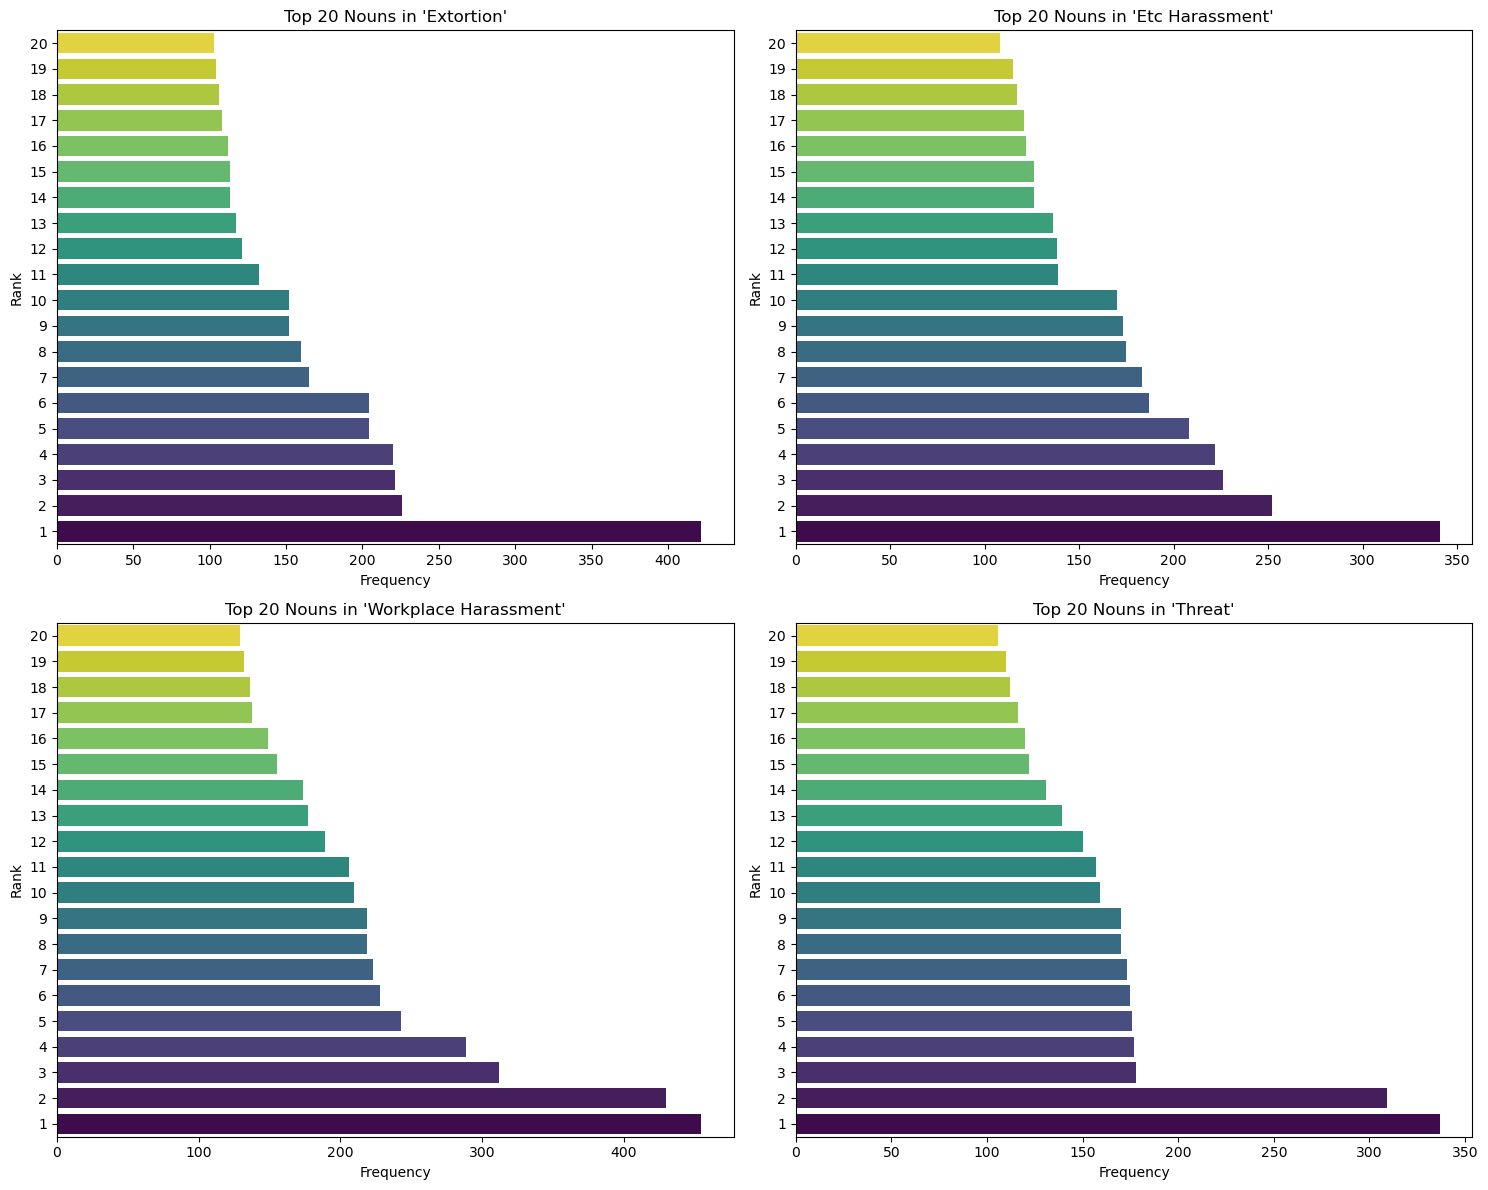

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. 2x2 형태의 그래프 영역 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# 2. 각 클래스별로 반복하며 그래프 그리기
class_names = sorted(train_df['class'].unique())

for i, class_name in enumerate(class_names):
    english_class_name = label_map.get(class_name, class_name)
    nouns_for_class = train_df[train_df['class'] == class_name]['nouns'].sum()
    word_counts = Counter(nouns_for_class)
    top_20_nouns = word_counts.most_common(20)
    
    words, counts = zip(*top_20_nouns)
    
    ranks = range(1, len(words) + 1)
    
    # 옵션과 닫는 괄호를 추가하여 완성한 라인
    sns.barplot(x=list(counts), y=list(ranks), hue=list(ranks), ax=axes[i], palette='viridis', legend=False, orient='h')
    
    axes[i].set_title(f"Top 20 Nouns in '{english_class_name}'")
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Rank')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

# 단어 분석 경향성

Class: Workplace Harassment (직장 내 괴롭힘)
핵심 인사이트: 직장이라는 특정 환경을 나타내는 어휘가 압도적으로 많습니다.

주요 키워드: 회사, 대리, 부장, 과장, 팀장 (직급/소속), 업무, 휴가, 시간 (업무 관련), 자네, 말씀 (상하 관계 암시).

분석: 이 클래스는 명사 키워드만으로도 정체성이 가장 명확합니다. 키워드들이 '직장'이라는 특정 도메인에 강하게 결합되어 있어, 모델이 이 클래스를 분류하는 데 매우 중요한 단서로 작용할 것입니다.

Class: Etc Harassment (기타 괴롭힘)
핵심 인사이트: 직접적인 인신공격, 외모 비하, 특정 상황(고객 불만)과 관련된 다양한 어휘가 특징입니다.

주요 키워드: 새끼, 장애, 돼지 (모욕/비하), 얼굴, 냄새, 남자, 부모 (인신공격 대상), 고객, 환불 (고객 불만 상황).

분석: 클래스의 이름처럼, 특정 주제에 얽매이지 않는 다양한 종류의 괴롭힘이 키워드에 그대로 반영됩니다. 특히, 다른 사람을 비하하는 명사의 등장이 이 클래스의 주요 특징입니다.

Class: Threat (협박)
핵심 인사이트: 대화가 단순한 다툼을 넘어 심각한 상황으로 확대될 것을 암시하는 명사들이 주로 나타납니다.

주요 키워드: 가족 (위협의 대상), 신고, 경찰 (사법기관 개입 암시), 새끼 (공격성 표현), 정신, 소리 (심리적 압박).

분석: 'Etc Harassment'와 '새끼'라는 모욕적인 표현을 공유하지만, '협박' 클래스에서는 여기에 **'가족'**과 **'경찰'**이 더해져 상황의 심각성이 훨씬 높다는 것을 알 수 있습니다.

Class: Extortion (갈취)
핵심 인사이트: 다른 클래스에 비해 주제를 특정하는 명확한 명사 키워드가 상위권에 적습니다.

주요 키워드: 엄마, 친구, 우리, 여기, 이거 등 일반적이거나 관계를 나타내는 단어가 많습니다.

분석: 이전 형태소 분석에서는 '돈'이 명확히 드러났지만, 명사만 추출했을 때는 상위 20위 안에 들지 못했습니다. 이는 '갈취' 대화가 직접적인 명사('돈')보다는 "얼마야", "보내" 등 다른 품사를 통해 이루어지거나, 명확한 키워드 없이 일반적인 대화처럼 시작하는 경우가 많을 수 있음을 시사합니다.

종합 결론 및 다음 단계
명사 분석의 효과: 명사만 추출하는 것만으로도 '직장', '인신공격', '심각한 위협' 등 각 클래스의 핵심적인 주제를 매우 효과적으로 포착할 수 있습니다.

한계점: 여전히 우리, 사람, 여기, 이거 등 모든 클래스에 공통적으로 나타나는 일반 명사들이 상위권에 존재합니다. 더 정교한 분석을 위해서는 이런 단어들을 불용어로 추가하거나 TF-IDF 같은 기법을 적용할 필요가 있습니다.

모델링 활용: 이 키워드 목록은 향후 머신러닝 모델의 특징(Feature)으로 사용하거나, 특정 키워드의 유무에 따라 가중치를 주는 등 성능 향상에 직접적으로 활용될 수 있습니다.

In [18]:
from collections import Counter

# 불용어 리스트는 분석 대상이 한글이므로 그대로 유지합니다.
stopwords = ['습니다', '합니다', '그', '수', '에', '에서', '을', '를', '은', '는', '이', '가', '것', '저']

# 그래프 라벨을 한글에서 영어로 변환했던 딕셔너리를 재사용합니다. 🇬🇧
label_map = {
    '기타 괴롭힘 대화': 'Etc Harassment',
    '갈취 대화': 'Extortion',
    '직장 내 괴롭힘 대화': 'Workplace Harassment',
    '협박 대화': 'Threat'
}

# 클래스별로 가장 많이 사용된 상위 20개 어휘 추출
for class_name in train_df['class'].unique():
    # 해당 클래스의 모든 형태소(토큰)를 하나의 리스트로 만듦
    tokens_for_class = train_df[train_df['class'] == class_name]['corpus'].sum()

    # 불용어 제거
    tokens_for_class = [word for word in tokens_for_class if word not in stopwords]

    # 단어 빈도 계산
    word_counts = Counter(tokens_for_class)

    # 영어 클래스 이름 가져오기
    english_class_name = label_map.get(class_name, class_name)

    # 출력문을 영어로 수정
    print(f"--- Top 20 Keywords in '{english_class_name}' ---")
    print(word_counts.most_common(20))
    print("\n")

--- Top 20 Keywords in 'Threat' ---
[('.', 5782), ('?', 3559), ('하', 2188), ('어', 1878), ('야', 1865), ('고', 1694), ('너', 1596), ('거', 1495), ('지', 1485), ('내', 1447), ('나', 1218), ('도', 1100), ('!', 1099), ('해', 1064), ('말', 1027), ('아', 1027), ('게', 1002), ('안', 973), ('네', 971), ('면', 964)]


--- Top 20 Keywords in 'Etc Harassment' ---
[('.', 6285), ('?', 4478), ('하', 2509), ('야', 2136), ('너', 1691), ('고', 1609), ('아', 1594), ('지', 1531), ('어', 1506), ('거', 1424), ('나', 1340), ('도', 1266), ('해', 1258), ('네', 1175), ('말', 1038), ('내', 980), ('아니', 979), ('다', 971), ('안', 970), ('왜', 930)]


--- Top 20 Keywords in 'Extortion' ---
[('.', 6213), ('?', 3988), ('어', 1706), ('야', 1685), ('고', 1559), ('돈', 1538), ('하', 1530), ('나', 1337), ('안', 1258), ('아', 1161), ('거', 1145), ('내', 1123), ('없', 1103), ('네', 1076), ('만', 1072), ('너', 1007), ('지', 991), ('도', 967), ('있', 937), ('게', 907)]


--- Top 20 Keywords in 'Workplace Harassment' ---
[('.', 6043), ('?', 4669), ('하', 3020), ('고', 1768), 

#형태소 분석 경향성

핵심 인사이트는, 가장 빈도가 높은 단어들은 대부분 의미 없는 조사나 대명사이지만, 그 바로 아래 순위에서 각 클래스의 정체성을 드러내는 핵심 키워드들이 명확하게 나타난다는 것입니다.

1. 공통적인 기능어의 높은 빈도
문제점: .(마침표), ?(물음표), 하(하다), 너(대명사), 고(연결어미) 등은 모든 클래스에서 매우 높은 빈도로 나타납니다. 이런 단어들은 문장을 구성하는 데 필수적인 기능적 역할을 할 뿐, 클래스를 구분하는 데는 거의 도움이 되지 않습니다.

시사점: 효과적인 모델 학습을 위해서는, 이런 단어들을 불용어(stopwords)로 추가하여 제거하거나, 단순히 빈도 수(Count)만 보는 것이 아니라 TF-IDF와 같이 특정 클래스에서만 더 중요한 단어에 가중치를 주는 방법을 사용해야 합니다.

2. 클래스별 핵심 신호 어휘
공통 어휘를 제외하고 각 클래스의 특징을 보여주는 핵심 단어들은 다음과 같습니다.

Extortion (갈취) 💰

돈(money)이라는 매우 강력하고 명확한 키워드가 다른 클래스에서는 보이지 않는 최상위권에 있습니다. 이는 갈취 대화의 핵심 주제가 금전임을 명확히 보여줍니다.

없(없다), 있(있다) 등의 단어도 금전의 유무를 묻는 맥락에서 자주 사용된 것으로 보입니다.

Workplace Harassment (직장 내 괴롭힘) 🏢

죄송(sorry), 일(work), 님(honorific)과 같은 단어들이 두드러집니다. 이는 대화가 직장이라는 공식적이고 수직적인 관계 속에서 일어나고 있음을 암시합니다.

Etc Harassment (기타 괴롭힘) 🗣️

왜(why), 아니(no)와 같은 단어들이 높은 순위에 있습니다. 이는 주제가 명확하지 않은 일반적인 말다툼이나 시비 상황에서 자주 사용되는 따져 묻는 어조를 반영합니다.

Threat (협박) 🔪

!(느낌표)의 빈도가 높게 나타납니다. 이는 다른 클래스에 비해 더 감정적이고 긴급한 어조가 많이 사용됨을 시사합니다.

종합 결론
이 분석을 통해, 비록 표면적으로는 비슷한 단어가 많아 보여도 각 클래스는 자신만의 고유한 어휘 패턴을 가지고 있음을 확인할 수 있습니다. 향후 모델 성능을 높이기 위해서는, 모든 클래스에 공통적인 기능어들을 불용어로 제거하고, 각 클래스를 대표하는 핵심 키워드에 높은 가중치가 부여되도록 하는 전략이 유효합니다.

In [7]:
#데이터 길이 분포

최대 문장 길이: 874
평균 문장 길이: 226.57


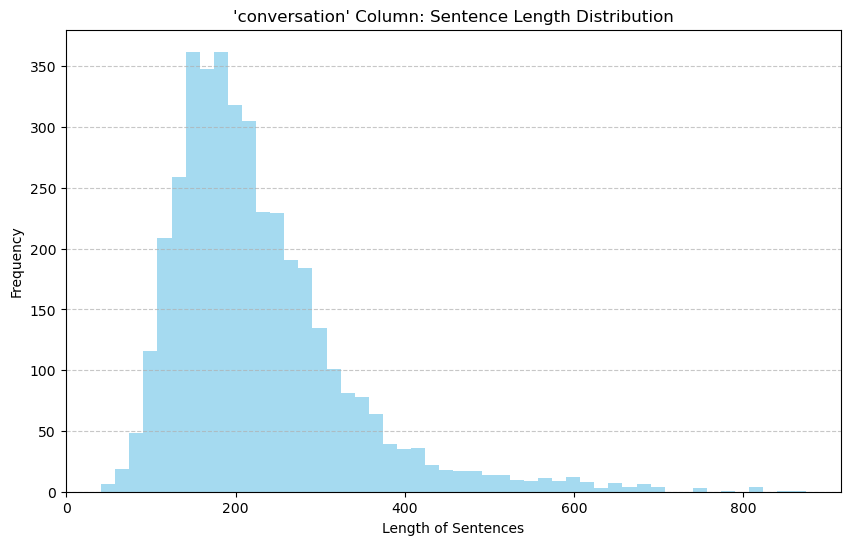

In [8]:
import matplotlib.pyplot as plt

# 1. 분석할 텍스트 컬럼('conversation')을 명확히 지정 📝
# 각 대화의 길이를 계산하여 새로운 Series 객체로 저장합니다.
text_lengths = train_df['conversation'].map(len)

# 2. Pandas 기능을 활용하여 최대/평균 길이 계산
print(f'최대 문장 길이: {text_lengths.max()}')
print(f'평균 문장 길이: {text_lengths.mean():.2f}')

# 3. 문장 길이 분포 히스토그램 생성 📊
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, alpha=0.75, color='skyblue')
plt.title('\'conversation\' Column: Sentence Length Distribution') # 제목
plt.xlabel('Length of Sentences') # X축 라벨
plt.ylabel('Frequency') # Y축 라벨
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
#토큰 개수 분포

In [10]:
# # 1. Konlpy 라이브러리 설치
# !pip install konlpy

# # 2. Mecab 형태소 분석기 설치
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [11]:
# 1. Konlpy 라이브러리에서 Mecab을 import 합니다.
from konlpy.tag import Mecab

# 2. Mecab 객체를 생성합니다.
mecab = Mecab()

# 3. 분석할 데이터인 train_df['conversation'] 컬럼을 리스트로 변환합니다.
train_list = train_df['conversation'].tolist()

# 4. 리스트 내포(List Comprehension)를 사용하여 각 문장을 형태소로 분리합니다. 🤖
corpus = [mecab.morphs(text) for text in train_list]

# 첫 번째 문장의 형태소 분석 결과 확인
print(corpus[0])

['지금', '너', '스스로', '를', '죽여', '달', '라고', '애원', '하', '는', '것', '인가', '?', '아닙니다', '.', '죄송', '합니다', '.', '죽', '을', '거', '면', '혼자', '죽', '지', '우리', '까지', '사건', '에', '휘말리', '게', '해', '?', '진짜', '죽여', '버리', '고', '싶', '게', '.', '정말', '잘못', '했', '습니다', '.', '너', '가', '선택', '해', '.', '너', '가', '죽', '을래', '네', '가족', '을', '죽여', '줄까', '.', '죄송', '합니다', '.', '정말', '잘못', '했', '습니다', '.', '너', '에게', '는', '선택', '권', '이', '없', '어', '.', '선택', '못', '한다면', '너', '와', '네', '가족', '까지', '모조리', '죽여', '버릴', '거', '야', '.', '선택', '못', '하', '겠', '습니다', '.', '한', '번', '만', '도와', '주', '세요', '.', '그냥', '다', '죽여', '버려야', '겠', '군', '.', '이', '의', '없', '지', '?', '제발', '도와', '주', '세요', '.']
